# Проект: Оптимизация коэффициента восстановления золота 

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics.scorer import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
pd.set_option('display.max_columns', 90)

###  Откройте файлы и изучите их

In [2]:
#data_train = pd.read_csv('###')
#data_test = pd.read_csv('###')
#data_full = pd.read_csv('###')

<b>Схема процесса флотации и очистки(собственной разработки)</b>

[Схема флотации](https://yadi.sk/i/5r1FfzD7hfgdwg)

In [3]:
display(data_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

None

In [4]:
display(data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

None

In [5]:
display(data_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

None

In [6]:
# Смотрим пропуски в data_train:
for col in data_train:
    if data_train[col].isna().sum() != 0:
        print('Nan/null {}: {}, доля: {:.1%}'.format(col, data_train[col].isna().sum(), 
                                                         (data_train[col].isna().sum() / len(data_train))))

Nan/null final.output.concentrate_ag: 72, доля: 0.4%
Nan/null final.output.concentrate_pb: 72, доля: 0.4%
Nan/null final.output.concentrate_sol: 370, доля: 2.2%
Nan/null final.output.concentrate_au: 71, доля: 0.4%
Nan/null final.output.recovery: 1521, доля: 9.0%
Nan/null final.output.tail_ag: 66, доля: 0.4%
Nan/null final.output.tail_pb: 183, доля: 1.1%
Nan/null final.output.tail_sol: 145, доля: 0.9%
Nan/null final.output.tail_au: 66, доля: 0.4%
Nan/null primary_cleaner.input.sulfate: 1307, доля: 7.8%
Nan/null primary_cleaner.input.depressant: 1262, доля: 7.5%
Nan/null primary_cleaner.input.xanthate: 985, доля: 5.8%
Nan/null primary_cleaner.output.concentrate_ag: 82, доля: 0.5%
Nan/null primary_cleaner.output.concentrate_pb: 358, доля: 2.1%
Nan/null primary_cleaner.output.concentrate_sol: 636, доля: 3.8%
Nan/null primary_cleaner.output.concentrate_au: 82, доля: 0.5%
Nan/null primary_cleaner.output.tail_ag: 83, доля: 0.5%
Nan/null primary_cleaner.output.tail_pb: 99, доля: 0.6%
Nan/null 

In [7]:
# Смотрим пропуски в data_test:
for col in data_test:
    if data_test[col].isna().sum() != 0:
        print('Nan/null {}: {}, доля: {:.1%}'.format(col, data_test[col].isna().sum(), 
                                                         (data_test[col].isna().sum() / len(data_test))))

Nan/null primary_cleaner.input.sulfate: 302, доля: 5.2%
Nan/null primary_cleaner.input.depressant: 284, доля: 4.8%
Nan/null primary_cleaner.input.xanthate: 166, доля: 2.8%
Nan/null primary_cleaner.state.floatbank8_a_air: 16, доля: 0.3%
Nan/null primary_cleaner.state.floatbank8_a_level: 16, доля: 0.3%
Nan/null primary_cleaner.state.floatbank8_b_air: 16, доля: 0.3%
Nan/null primary_cleaner.state.floatbank8_b_level: 16, доля: 0.3%
Nan/null primary_cleaner.state.floatbank8_c_air: 16, доля: 0.3%
Nan/null primary_cleaner.state.floatbank8_c_level: 16, доля: 0.3%
Nan/null primary_cleaner.state.floatbank8_d_air: 16, доля: 0.3%
Nan/null primary_cleaner.state.floatbank8_d_level: 16, доля: 0.3%
Nan/null rougher.input.feed_ag: 16, доля: 0.3%
Nan/null rougher.input.feed_pb: 16, доля: 0.3%
Nan/null rougher.input.feed_rate: 40, доля: 0.7%
Nan/null rougher.input.feed_size: 22, доля: 0.4%
Nan/null rougher.input.feed_sol: 67, доля: 1.1%
Nan/null rougher.input.feed_au: 16, доля: 0.3%
Nan/null rougher.inpu

In [8]:
# Смотрим пропуски в data_full:
for col in data_full:
    if data_full[col].isna().sum() != 0:
        print('Nan/null {}: {}, доля: {:.1%}'.format(col, data_full[col].isna().sum(), 
                                                         (data_full[col].isna().sum() / len(data_full))))

Nan/null final.output.concentrate_ag: 89, доля: 0.4%
Nan/null final.output.concentrate_pb: 87, доля: 0.4%
Nan/null final.output.concentrate_sol: 385, доля: 1.7%
Nan/null final.output.concentrate_au: 86, доля: 0.4%
Nan/null final.output.recovery: 1963, доля: 8.6%
Nan/null final.output.tail_ag: 83, доля: 0.4%
Nan/null final.output.tail_pb: 200, доля: 0.9%
Nan/null final.output.tail_sol: 271, доля: 1.2%
Nan/null final.output.tail_au: 81, доля: 0.4%
Nan/null primary_cleaner.input.sulfate: 1609, доля: 7.1%
Nan/null primary_cleaner.input.depressant: 1546, доля: 6.8%
Nan/null primary_cleaner.input.xanthate: 1151, доля: 5.1%
Nan/null primary_cleaner.output.concentrate_ag: 98, доля: 0.4%
Nan/null primary_cleaner.output.concentrate_pb: 448, доля: 2.0%
Nan/null primary_cleaner.output.concentrate_sol: 798, доля: 3.5%
Nan/null primary_cleaner.output.concentrate_au: 98, доля: 0.4%
Nan/null primary_cleaner.output.tail_ag: 102, доля: 0.4%
Nan/null primary_cleaner.output.tail_pb: 122, доля: 0.5%
Nan/nu

In [9]:
data_full.loc[data_full.duplicated()]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


In [10]:
data_train.loc[data_full.duplicated()]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


In [11]:
data_test.loc[data_full.duplicated()]

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


In [12]:
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [13]:
data_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,21170.000000,22716.000000,21565.000000,22618.000000,22268.000000,21918.000000,22618.000000,22614.000000,22594.000000,22365.000000,22617.000000,22660.000000,22667.000000,22660.000000,22673.000000,22662.000000,22673.000000,22661.000000,22673.000000,2.267200e+04,2.267200e+04,2.267200e+04,21089.000000,22618.000000,22472.000000,22163.000000,22277.000000,22357.000000,22617.000000,21415.000000,22247.000000,22038.000000,20459.000000,22618.000000,22618.000000,22526.000000,22618.000000,19597.000000,19979.000000,22618.000000,19980.000000,19980.000000,22646.000000,22647.000000,22646.000000,22647.000000,22646.000000,22654.000000,22641.000000,22649.000000,22096.000000,22649.000000,22641.000000,22642.000000,22616.000000,22600.000000,20501.000000,22618.000000,22333.000000,22591.000000,22538.000000,22588.000000,22585.000000,22587.000000,22592.000000,22590.000000,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615

In [14]:
print("Train date:")
display(data_train['date'].min())
display(data_train['date'].max())
print("Test date:")
display(data_test['date'].min())
display(data_test['date'].max())

Train date:


'2016-01-15 00:00:00'

'2018-08-18 10:59:59'

Test date:


'2016-09-01 00:59:59'

'2017-12-31 23:59:59'

<b>Проверим тестовые данные на мультиколлинеарность</b>

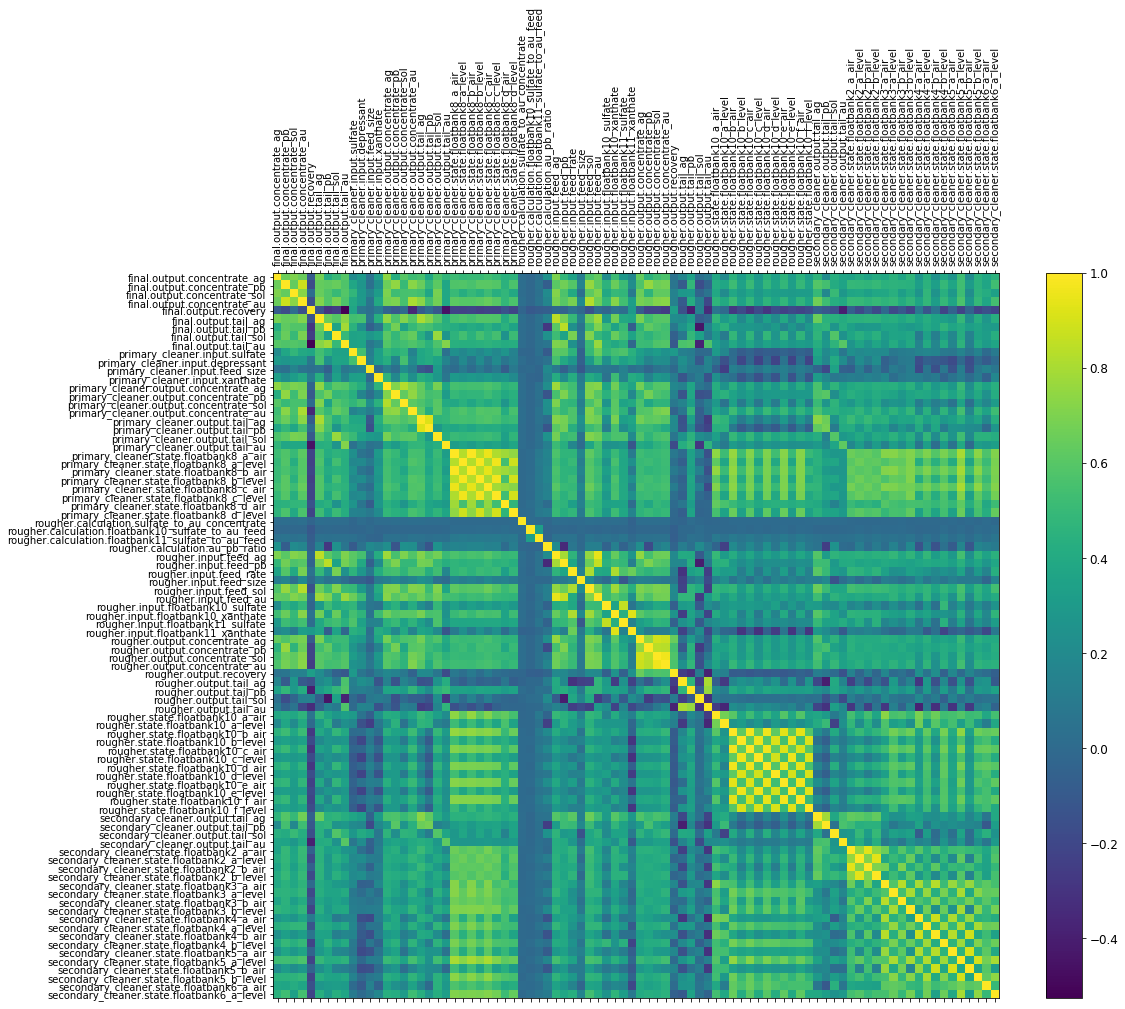

In [15]:
f = plt.figure(figsize=(17, 13))
plt.matshow(data_train.corr(), fignum=f.number)
plt.xticks(range(data_train.select_dtypes(['number']).shape[1]), data_train.select_dtypes(['number']).columns, 
           fontsize=10, rotation=90)
plt.yticks(range(data_train.select_dtypes(['number']).shape[1]), data_train.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)

<b>Взглянем на корреляцию выше 0.9 и ниже 1(исключить одноимённые позиции) и распределение пар на графике</b>

In [16]:
train_corr = data_train.corr()
corr_pairs = train_corr.unstack()
temp_corr = corr_pairs.sort_values(ascending=False)
temp_corr = temp_corr[(abs(temp_corr) < 1) & (abs(temp_corr) > 0.9)]
display(temp_corr.head())
display(len(temp_corr))

primary_cleaner.state.floatbank8_b_air    primary_cleaner.state.floatbank8_a_air      0.992513
primary_cleaner.state.floatbank8_a_air    primary_cleaner.state.floatbank8_b_air      0.992513
primary_cleaner.state.floatbank8_a_level  primary_cleaner.state.floatbank8_b_level    0.980462
primary_cleaner.state.floatbank8_b_level  primary_cleaner.state.floatbank8_a_level    0.980462
rougher.state.floatbank10_e_air           rougher.state.floatbank10_f_air             0.975193
dtype: float64

66

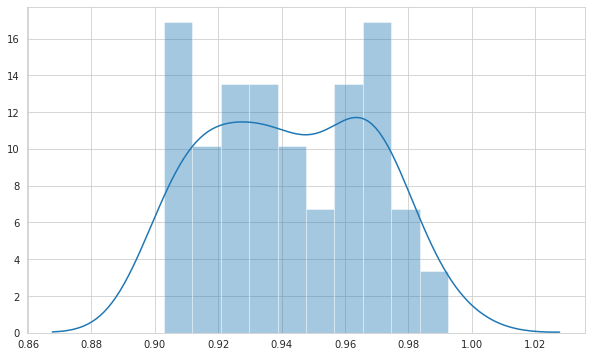

In [17]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.distplot(temp_corr, bins=10)
plt.show()

<b>В наличии 66 сильно коррелирующих пар)</b>

<b>Вывод: В данных есть выбросы и пропуски, а также недостаёт столбцов в тестовом наборе</b>

### Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдём MAE между расчётами и значением признака

$$RECOVERY = \frac{C*(F-T)}{F*(C-T)}*100\%$$

In [18]:
def recovery_func(C, F, T):
    """
    C - доля золота в концентрате после флотации/очистки
    F - доля золота в концентрате до флотации/очистки
    T - доля золота в отвальных хвостах после флотации/очистки
    """
    return ((C * (F - T)) / (F * (C - T))) * 100

In [19]:
tr_target = data_train['rougher.output.recovery']
tr_target = tr_target.dropna()

In [20]:
recovery = recovery_func(data_train['rougher.output.concentrate_au'].fillna(0), 
                         data_train['rougher.input.feed_au'].fillna(0), 
                         data_train['rougher.output.tail_au'].fillna(0))

In [21]:
recovery = pd.Series(recovery, index=tr_target.index)

In [22]:
print(mean_absolute_error(tr_target, recovery))

9.444891926100695e-15


### Анализ признаков, недоступных в тестовой выборке

In [23]:
lost_features = [col for col in data_train if col not in data_test.columns]
display(lost_features)

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

<b>Отсутствующие параметры в тестовом датасете:</b>
* <b>Черновые концентраты</b> после флотации, первичной и вторичной очистки
* <b>Отвальные хвосты</b> после флотации, первичной и вторичной очистки, а также финальный концентрат
* <b>Расчётные характеристики соотношений веществ</b> в флотационной машине 

### Проведём предобработку данных

<b>Добавим в тестовые данные недостающие из full датасета по дате/времени записи</b>

In [24]:
lost_features.append('date')

In [25]:
new_test = data_test.merge(data_full[lost_features], on='date')

<b>Для начала удалим пропуски в целевых метках, так как произвольное заполнение исказит обучение модели и качество метрики</b>

In [26]:
data_train.dropna(subset=['final.output.recovery', 'rougher.output.recovery'], inplace=True)

In [27]:
new_test.dropna(subset=['final.output.recovery', 'rougher.output.recovery'], inplace=True)

<b>Заполним остальные пропуски средним значением</b>

In [28]:
# Заполним пропуски в data_train:
for col in data_train:
    if data_train[col].isna().sum() != 0:
        data_train[col] = data_train[col].ffill(axis = 0)

In [29]:
# Заполним пропуски в new_test:
for col in new_test:
    if new_test[col].isna().sum() != 0:
        new_test[col] = new_test[col].ffill(axis = 0)

In [30]:
# Заполним пропуски в data_full:
for col in data_full:
    if data_full[col].isna().sum() != 0:
        data_full[col] = data_full[col].ffill(axis = 0)

## Анализ данных

### Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

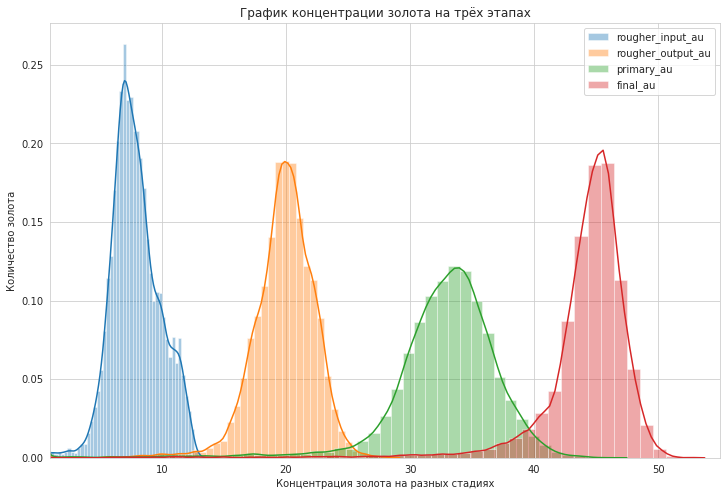

In [31]:
plt.figure(figsize=(12, 8))
sns.distplot(data_train['rougher.input.feed_au'], label='rougher_input_au')
sns.distplot(data_train['rougher.output.concentrate_au'], label='rougher_output_au')
sns.distplot(data_train['primary_cleaner.output.concentrate_au'], label='primary_au')
sns.distplot(data_train['final.output.concentrate_au'], label='final_au')
plt.xlabel('Концентрация золота на разных стадиях')
plt.ylabel('Количество золота')
plt.title('График концентрации золота на трёх этапах')
plt.legend()
plt.xlim(1, 55)
plt.show()

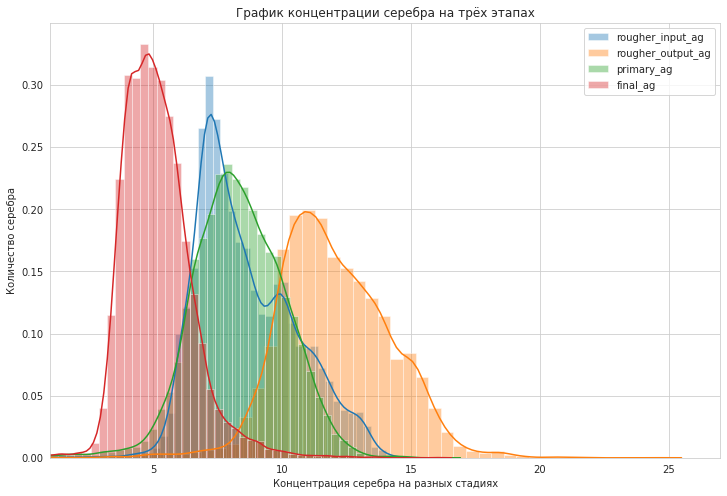

In [32]:
plt.figure(figsize=(12, 8))
sns.distplot(data_train['rougher.input.feed_ag'], label='rougher_input_ag')
sns.distplot(data_train['rougher.output.concentrate_ag'], label='rougher_output_ag')
sns.distplot(data_train['primary_cleaner.output.concentrate_ag'], label='primary_ag')
sns.distplot(data_train['final.output.concentrate_ag'], label='final_ag')
plt.xlabel('Концентрация серебра на разных стадиях')
plt.ylabel('Количество серебра')
plt.title('График концентрации серебра на трёх этапах')
plt.legend()
plt.xlim(1, 27)
plt.show()

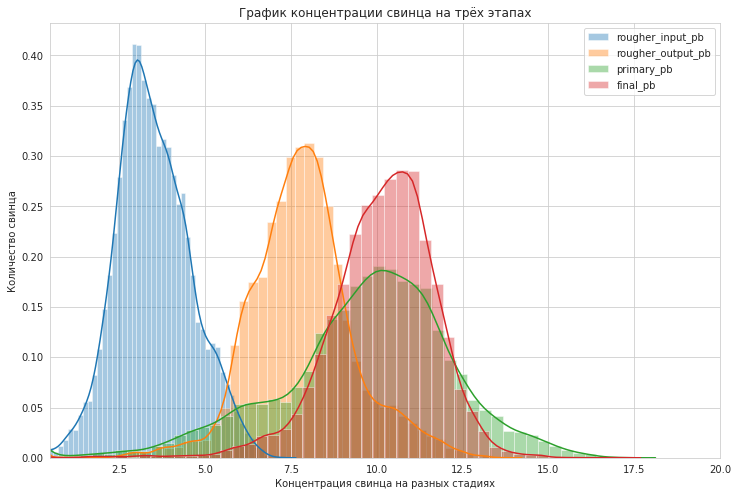

In [33]:
plt.figure(figsize=(12, 8))
sns.distplot(data_train['rougher.input.feed_pb'], label='rougher_input_pb')
sns.distplot(data_train['rougher.output.concentrate_pb'], label='rougher_output_pb')
sns.distplot(data_train['primary_cleaner.output.concentrate_pb'], label='primary_pb')
sns.distplot(data_train['final.output.concentrate_pb'], label='final_pb')
plt.xlabel('Концентрация свинца на разных стадиях')
plt.ylabel('Количество свинца')
plt.title('График концентрации свинца на трёх этапах')
plt.legend()
plt.xlim(0.5, 20)
plt.show()

<b>2.1 Вывод:</b>
* Золото на первом графике, на каждой стадии вырастает в концентрации и в финальной стадии очистки достигает максимума
* Серебро наоборот после флотации возрастает и с последующими стадиями уменьшается. В финальной стадии очистки его уровень падает от 0 до 8
* Свинец после флотации и первой очистки закрепляется в своём максимуме

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

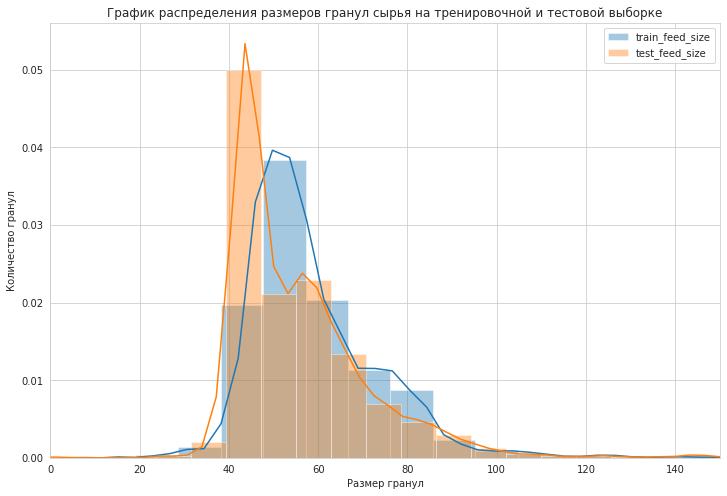

In [34]:
plt.figure(figsize=(12, 8))
sns.distplot(data_train['rougher.input.feed_size'], label='train_feed_size')
sns.distplot(new_test['rougher.input.feed_size'], label='test_feed_size')
plt.xlabel('Размер гранул')
plt.ylabel('Количество гранул')
plt.title('График распределения размеров гранул сырья на тренировочной и тестовой выборке')
plt.legend()
plt.xlim(0, 150)
plt.show()

<b>2.2 Вывод </b>

Оба распределения приблизительно равны, так что оценка модели будет адекватной

### Суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Поиск аномальных значений в суммарном распределении

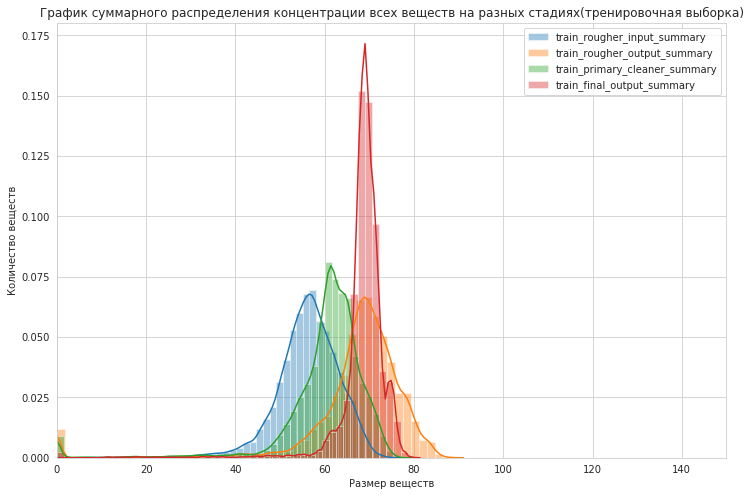

In [35]:
plt.figure(figsize=(12, 8))
sns.distplot(data_train[['rougher.input.feed_ag', 
                         'rougher.input.feed_au', 
                         'rougher.input.feed_pb', 
                         'rougher.input.feed_sol']].sum(axis=1), label='train_rougher_input_summary')
sns.distplot(data_train[['rougher.output.concentrate_ag', 
                         'rougher.output.concentrate_au', 
                         'rougher.output.concentrate_pb', 
                         'rougher.output.concentrate_sol']].sum(axis=1), label='train_rougher_output_summary')
sns.distplot(data_train[['primary_cleaner.output.concentrate_ag', 
                         'primary_cleaner.output.concentrate_au', 
                         'primary_cleaner.output.concentrate_pb', 
                         'primary_cleaner.output.concentrate_sol']].sum(axis=1), label='train_primary_cleaner_summary')
sns.distplot(data_train[['final.output.concentrate_ag', 
                         'final.output.concentrate_au', 
                         'final.output.concentrate_pb', 
                         'final.output.concentrate_sol']].sum(axis=1), label='train_final_output_summary')
plt.xlabel('Размер веществ')
plt.ylabel('Количество веществ')
plt.title('График суммарного распределения концентрации всех веществ на разных стадиях(тренировочная выборка)')
plt.legend()
plt.xlim(0, 150)
plt.show()

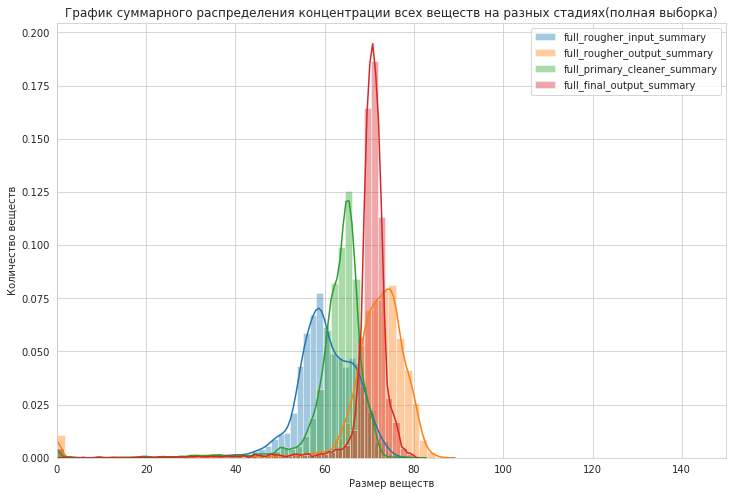

In [36]:
plt.figure(figsize=(12, 8))
sns.distplot(new_test[['rougher.input.feed_ag', 
                         'rougher.input.feed_au', 
                         'rougher.input.feed_pb', 
                         'rougher.input.feed_sol']].sum(axis=1), label='full_rougher_input_summary')
sns.distplot(new_test[['rougher.output.concentrate_ag', 
                         'rougher.output.concentrate_au', 
                         'rougher.output.concentrate_pb', 
                         'rougher.output.concentrate_sol']].sum(axis=1), label='full_rougher_output_summary')
sns.distplot(new_test[['primary_cleaner.output.concentrate_ag', 
                         'primary_cleaner.output.concentrate_au', 
                         'primary_cleaner.output.concentrate_pb', 
                         'primary_cleaner.output.concentrate_sol']].sum(axis=1), label='full_primary_cleaner_summary')
sns.distplot(new_test[['final.output.concentrate_ag', 
                         'final.output.concentrate_au', 
                         'final.output.concentrate_pb', 
                         'final.output.concentrate_sol']].sum(axis=1), label='full_final_output_summary')
plt.xlabel('Размер веществ')
plt.ylabel('Количество веществ')
plt.title('График суммарного распределения концентрации всех веществ на разных стадиях(полная выборка)')
plt.legend()
plt.xlim(0, 150)
plt.show()

<b>Наблюдаем аномалии среди нулевых значений, а большая часть суммарной концентрации распределена в другом диапазоне. Также в тренировочном и полном датасете распределения совпадают. Решение - удалить нулевые значения</b>

<b>Сформируем список списков, чтобы промаркировать записи с суммарной нулевой концентрацией</b>

In [37]:
anomalies_features = [
['rougher.input.feed_ag', 'rougher.input.feed_au', 'rougher.input.feed_pb', 'rougher.input.feed_sol'], 
['rougher.output.concentrate_ag', 'rougher.output.concentrate_au', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol'], 
['primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_pb', 
'primary_cleaner.output.concentrate_sol'], 
['final.output.concentrate_ag', 'final.output.concentrate_au', 'final.output.concentrate_pb', 'final.output.concentrate_sol']
]

<b>Напишем функцию маркировки данных</b>

In [38]:
def mark_anomalies(x, anomalies_list):
    # x[elem[0]], x[elem[1]], x[elem[2]], x[elem[3]]
    block1 = x[anomalies_list[0][0]] + x[anomalies_list[0][1]] + x[anomalies_list[0][2]] + x[anomalies_list[0][3]]
    block2 = x[anomalies_list[1][0]] + x[anomalies_list[1][1]] + x[anomalies_list[1][2]] + x[anomalies_list[1][3]]
    block3 = x[anomalies_list[2][0]] + x[anomalies_list[2][1]] + x[anomalies_list[2][2]] + x[anomalies_list[2][3]]
    block4 = x[anomalies_list[3][0]] + x[anomalies_list[3][1]] + x[anomalies_list[3][2]] + x[anomalies_list[3][3]]
    if (block1 < 1) or (block2 < 1) or (block3 < 1) or (block4 < 1):
        return 0
    else:
        return 1

In [39]:
data_train['check'] = data_train.apply(lambda x: mark_anomalies(x, anomalies_features), axis=1)

In [40]:
new_test['check'] = new_test.apply(lambda x: mark_anomalies(x, anomalies_features), axis=1)

In [41]:
display(data_train['check'].value_counts())
display(new_test['check'].value_counts())

1    13599
0      550
Name: check, dtype: int64

1    5123
0     167
Name: check, dtype: int64

<b>Сформируем финальные тренировочные и тестовые датасеты на основе маркеров, с удалением столбцов даты и маркера</b>

In [42]:
final_train = data_train.query('check == 1').drop(columns=['date', 'check'], axis=1)

In [43]:
final_test = new_test.query('check == 1').drop(columns=['date', 'check'], axis=1)

<b>Взглянем на количество данных после отсева нулевых маркеров</b>

In [44]:
display(len(final_train))
display(len(final_test))

13599

5123

<b>Взглянем ещё раз на графики, после очистки</b>

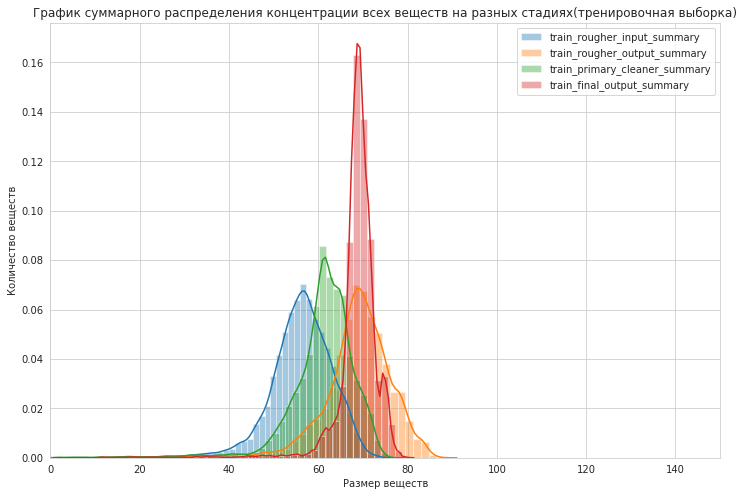

In [45]:
plt.figure(figsize=(12, 8))
sns.distplot(final_train[['rougher.input.feed_ag', 
                         'rougher.input.feed_au', 
                         'rougher.input.feed_pb', 
                         'rougher.input.feed_sol']].sum(axis=1), label='train_rougher_input_summary')
sns.distplot(final_train[['rougher.output.concentrate_ag', 
                         'rougher.output.concentrate_au', 
                         'rougher.output.concentrate_pb', 
                         'rougher.output.concentrate_sol']].sum(axis=1), label='train_rougher_output_summary')
sns.distplot(final_train[['primary_cleaner.output.concentrate_ag', 
                         'primary_cleaner.output.concentrate_au', 
                         'primary_cleaner.output.concentrate_pb', 
                         'primary_cleaner.output.concentrate_sol']].sum(axis=1), label='train_primary_cleaner_summary')
sns.distplot(final_train[['final.output.concentrate_ag', 
                         'final.output.concentrate_au', 
                         'final.output.concentrate_pb', 
                         'final.output.concentrate_sol']].sum(axis=1), label='train_final_output_summary')
plt.xlabel('Размер веществ')
plt.ylabel('Количество веществ')
plt.title('График суммарного распределения концентрации всех веществ на разных стадиях(тренировочная выборка)')
plt.legend()
plt.xlim(0, 150)
plt.show()

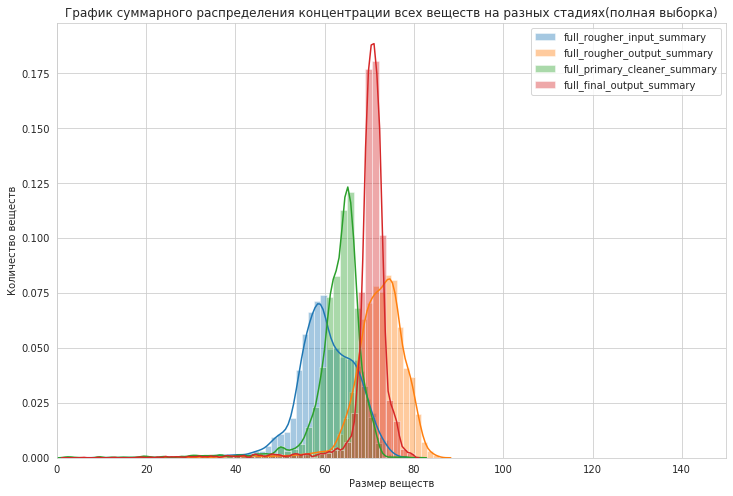

In [46]:
plt.figure(figsize=(12, 8))
sns.distplot(final_test[['rougher.input.feed_ag', 
                         'rougher.input.feed_au', 
                         'rougher.input.feed_pb', 
                         'rougher.input.feed_sol']].sum(axis=1), label='full_rougher_input_summary')
sns.distplot(final_test[['rougher.output.concentrate_ag', 
                         'rougher.output.concentrate_au', 
                         'rougher.output.concentrate_pb', 
                         'rougher.output.concentrate_sol']].sum(axis=1), label='full_rougher_output_summary')
sns.distplot(final_test[['primary_cleaner.output.concentrate_ag', 
                         'primary_cleaner.output.concentrate_au', 
                         'primary_cleaner.output.concentrate_pb', 
                         'primary_cleaner.output.concentrate_sol']].sum(axis=1), label='full_primary_cleaner_summary')
sns.distplot(final_test[['final.output.concentrate_ag', 
                         'final.output.concentrate_au', 
                         'final.output.concentrate_pb', 
                         'final.output.concentrate_sol']].sum(axis=1), label='full_final_output_summary')
plt.xlabel('Размер веществ')
plt.ylabel('Количество веществ')
plt.title('График суммарного распределения концентрации всех веществ на разных стадиях(полная выборка)')
plt.legend()
plt.xlim(0, 150)
plt.show()

<b>Посмотрим на выбросы в целевых столбцах</b>

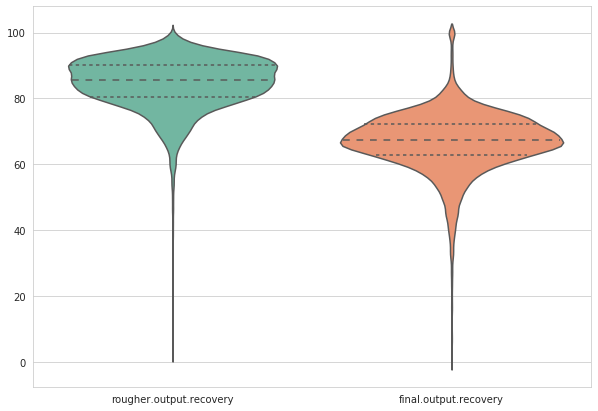

In [47]:
plt.figure(figsize=(10, 7))
sns.set_style('whitegrid')
sns.violinplot(data=final_train[['rougher.output.recovery', 'final.output.recovery']], 
               order=["rougher.output.recovery", "final.output.recovery"], palette="Set2", inner="quartile")
plt.show()

<b>Имеются сильные выбросы в данных, а это означает, что метрики в процессе кросс-валидации могут быть разными</b>

In [48]:
final_train = final_train[~(final_train['rougher.output.recovery'] == 0)]

## Модель

### Напишем функцию для вычисления итоговой sMAPE

$$sMAPE =  \frac{1}{N}\sum_{k=1}^{N}\frac{|y_i - |\hat y_i|}{(|y_i| + |\hat y_i|)/2} * 100\%$$

$$Итоговое\ sMAPE = {25\% * sMAPE(rougher) + 75\% * sMAPE(final)}$$

In [49]:
def smape_calc(target, pred):
    return sum((np.abs(target - pred) / ((np.abs(target) + np.abs(pred)) / 2))) / len(target)  * 100

In [50]:
def smape_final(target, pred):
    rougher_target = target['rougher.output.recovery']
    rougher_pred = pred[:,0]
    final_target = target['final.output.recovery']
    final_pred = pred[:,1]
    return 0.25 * smape_calc(rougher_target, rougher_pred) + 0.75 * smape_calc(final_target, final_pred)

In [51]:
my_scorer = make_scorer(smape_final, greater_is_better=False)

### Обучим разные модели и оцените их качество кросс-валидацией. Выберем лучшую модель и проверим её на тестовой выборке

In [52]:
train_target = final_train[['rougher.output.recovery', 'final.output.recovery']]
train_features = final_train.drop(columns=['rougher.output.recovery', 'final.output.recovery'], axis=1)

In [53]:
lost_features.remove('date')
lost_features.remove('rougher.output.recovery')
lost_features.remove('final.output.recovery')

In [54]:
test_target = final_test[['rougher.output.recovery', 'final.output.recovery']]
test_features = final_test.drop(columns=['rougher.output.recovery', 'final.output.recovery'], axis=1)
test_features = test_features.drop(columns=lost_features, axis=1)

<b>Подогнал размерность тренировочной выборки, иначе была ошибка</b>

In [55]:
train_features = train_features[test_features.columns]

In [56]:
##X_train, X_valid, y_train, y_valid = train_test_split(train_features, train_target, test_size=0.25, random_state=42)

<b>Для модели линейной регрессии отмасштабируем признаки</b>

In [57]:
scaler = StandardScaler()

In [58]:
scaler.fit(train_features)
scaled_features = pd.DataFrame(scaler.transform(train_features), index=train_features.index, columns=train_features.columns)

In [59]:
scaler.fit(test_features)
scaled_test_features = pd.DataFrame(scaler.transform(test_features), index=test_features.index, 
                                    columns=test_features.columns)

#### Обучение модели Линейной Регрессии с масштабированием

In [60]:
%%time
np.random.seed(111)
reg = LinearRegression(n_jobs=1)
results = cross_val_score(reg, scaled_features, train_target, cv=5, scoring=my_scorer)
results.mean()

CPU times: user 863 ms, sys: 809 ms, total: 1.67 s
Wall time: 1.66 s


-10.09107051018129

#### Обучение модели Регрессия Дерева

In [61]:
%%time
des = DecisionTreeRegressor(random_state=222)
des_results = cross_val_score(des, train_features, train_target, cv=5, scoring=my_scorer)
des_results.mean()

CPU times: user 5.32 s, sys: 0 ns, total: 5.32 s
Wall time: 5.44 s


-15.817064583932126

#### Обучение модели Регрессия Леса

In [62]:
### Много времени, поэтому закомментил
#%%time
#forest_model = RandomForestRegressor(random_state=223, n_estimators=100)
#forest_results = cross_val_score(forest_model, train_features, train_target, cv=5, scoring=my_scorer, n_jobs=-1, verbose=1)
#forest_results.mean()

<b>Среднее значение получилось -9.49</b>

#### Обучение модели Гребневой(ридж) регрессии

In [63]:
%%time
np.random.seed(444)
ridge_model = RidgeCV()
ridge_results = cross_val_score(ridge_model, train_features, train_target, cv=5, scoring=my_scorer)
ridge_results.mean()

CPU times: user 1.52 s, sys: 1.28 s, total: 2.8 s
Wall time: 2.75 s


-10.084373121216519

#### Обучение модели Регрессии K-близжайших соседей

In [64]:
%%time
np.random.seed(445)
knn_model = KNeighborsRegressor()
knne_results = cross_val_score(knn_model, train_features, train_target, cv=5, scoring=my_scorer)
knne_results.mean()

CPU times: user 4.83 s, sys: 9 µs, total: 4.83 s
Wall time: 4.84 s


-11.518579749014869

#### Обучение модели DummyRegressor

In [65]:
%%time
np.random.seed(666)
parameters = {
    'strategy':['quantile', 'median', 'mean', 'constant'], 'quantile':[0.0, 1.0], 
    'constant':[np.mean(train_target) * len(train_features)]}
dummy_model = DummyRegressor()
dummy_clf = GridSearchCV(dummy_model, parameters, scoring=my_scorer, cv=5)
dummy_clf.fit(train_features, train_target)
display(dummy_clf.best_params_)
display(dummy_clf.best_score_)

{'constant': rougher.output.recovery    1.149339e+06
 final.output.recovery      9.084621e+05
 dtype: float64,
 'quantile': 0.0,
 'strategy': 'median'}

-9.639348345276504

CPU times: user 333 ms, sys: 6.92 ms, total: 340 ms
Wall time: 354 ms


In [66]:
y_pred = dummy_clf.predict(test_features)
print(smape_final(test_target, y_pred))

7.378535504873787


<b>На тестовой выборке dummy регрессор улучшил свои показатели</b>

In [67]:
### Оооочень много времени, поэтому закомментил
#tuned_parameters = param_grid = { 
#            "n_estimators"      : np.arange(10, 100, 10),
#            "max_features"      : ["auto", "sqrt", "log2"],
#            "min_samples_split" : [0.1, 0.2, 0.4, 0.8, 2],
#            "min_samples_leaf" : [1, 2, 4, 5],
#            "bootstrap": [True, False],
#            }
#fold = KFold(n_splits=5, shuffle=True)
#rand_mod = RandomForestRegressor(random_state=668)
#rand_clf = GridSearchCV(rand_mod, tuned_parameters, cv=fold, scoring=my_scorer, n_jobs=-1, verbose=1)
#rand_clf.fit(train_features, train_target)

In [68]:
#display(rand_clf.best_score_)
#display(rand_clf.best_params_)

<b>Рейтинг моделей на кросс валидации:</b>
* LinearRegression - 10.06
* RidgeCV - 10.06
* RandomForestRegressor - 9.49, а значит будем тестировать её, как финальную. Её соперник DummyRegressor с sMAPE = 9.78

* Оценка модели RandomForestRegressor во время подбора гиперпараметров: 4.546

* Лучшие параметры: {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

<b>Финальная модель Регрессии Леса</b>

In [69]:
%%time
rand_fin = RandomForestRegressor(random_state=1000, bootstrap=False, max_features='sqrt', min_samples_split=2, 
                                 min_samples_leaf=1, n_estimators=100)
rand_fin.fit(train_features, train_target)
rand_pred = rand_fin.predict(test_features)
print(smape_final(test_target, rand_pred))

7.47870334695236
CPU times: user 19.7 s, sys: 89.2 ms, total: 19.8 s
Wall time: 20.4 s


<b>Итоги:</b>
* Мы изучили сложный процесс обогащения руды методом флотации, чтобы получить золото
* Нам дали промежуточные показатели процессов флотации и двухступенчатой очистки, которые мы проверили с помощью recovery функции
* В некоторых парах признаков имеется сильная корреляция, а также пропущенные значения, которые были обработаны
* Также мы исследовали концентрацию металлов на разных стадиях очистки, что позволило увидеть процесс отделения нужного материала
* Для дополнительного исследования суммарной концентрации мы дополнили данные их полного датасета, чтобы найти нулевую концентрацию, которая свидетельствовала о сбое ввыгрузке данных оборудованием. Эти данные были удалены.
* Также у нас были аномалии в целевых метках, которые благополучно были удалены
* С помощью кросс валидации мы нашли несколько моделей с близкими к 0 значениями и начали подбирать гиперпараметры
* Константная модель(sMAPE на тестовой выборке 7.37) выиграла RandomForestRegressor(sMAPE на тестовой выборке 7.47) с небольшим отрывом, что говорит о равенстве моделей. Для дальнейших исследований нужны будут новые данные и дальнейшие тесты)